<a href="https://colab.research.google.com/github/AmmarMalik93/MachineLearningSabKayLiey/blob/master/CNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit recognition using CNNs in Tensorflow(Keras)

Load required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load and Normalize MNIST dataset

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train/255.0).astype('float32') # Normalizing between 0 and 1
X_test = (X_test/255.0).astype('float32') # Normalizing between 0 and 1


print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Lets Display some images

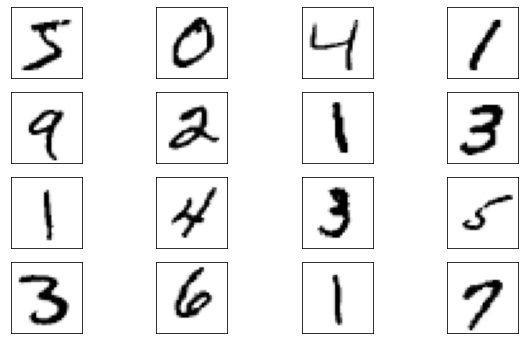

In [3]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
  ax.imshow(X_train[i,:,:], cmap='Greys')
  i += 1

Now reshape the digits to vectors

In [4]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) #28 x 28 x 1
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1) #28 x 28 x 1

print("New X_train shape", X_train.shape)
print("New X_test shape", X_test.shape)

New X_train shape (60000, 28, 28, 1)
New X_test shape (10000, 28, 28, 1)


In [0]:
num_class = 10
Y_train = to_categorical(y_train, num_class) 
Y_test = to_categorical(y_test, num_class)

In [6]:
input_shape = (X_train.shape[1],X_train.shape[2],1)
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_class, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

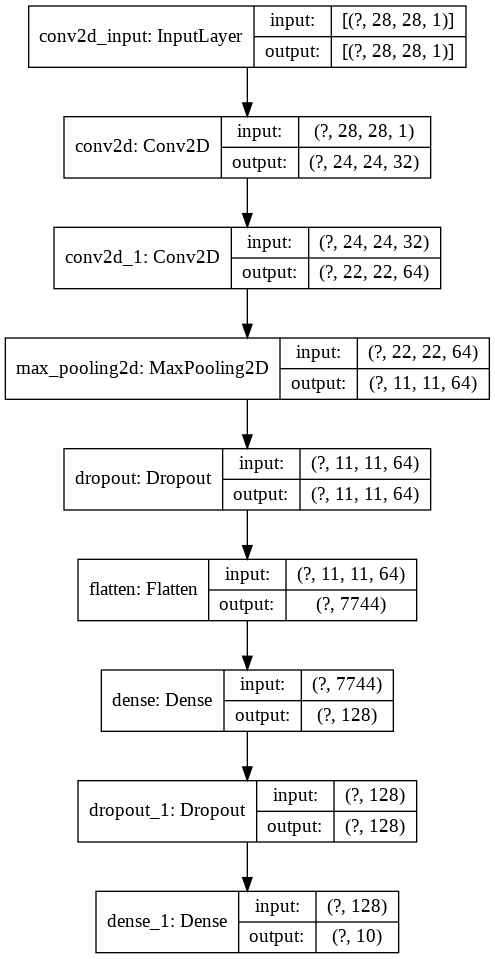

In [7]:
plot_model(model, show_shapes=True)

In [8]:
history = model.fit(X_train, Y_train, epochs = 10, verbose = 1, batch_size = 128, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2274 - accuracy: 0.9316 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0812 - accuracy: 0.9757 - val_loss: 0.0352 - val_accuracy: 0.9881
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0320 - val_accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0262 - val_accuracy: 0.9914
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0267 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 0.0229 - val_accuracy: 0.9933
Epoch

Text(0.5, 0.98, 'Model Performance')

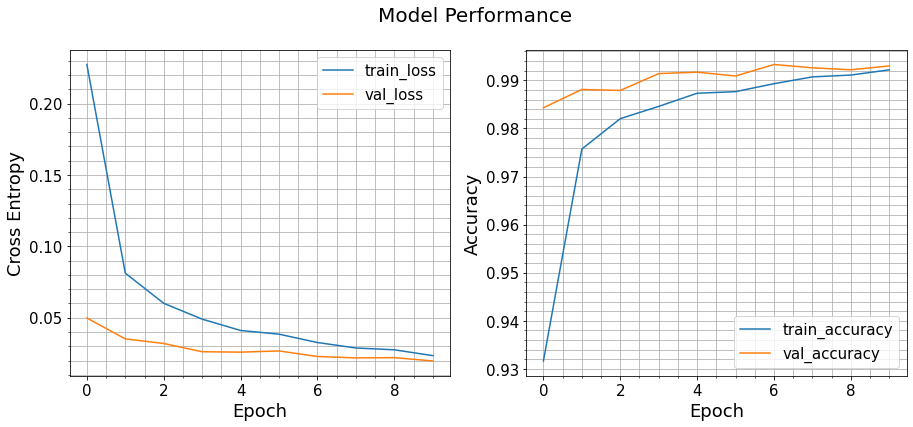

In [9]:
# plot learning curves
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))
#ax1.set_title('Learning Curves')
ax1.set_xlabel('Epoch', fontsize=18)
ax1.set_ylabel('Cross Entropy', fontsize=18)
ax1.grid(which='both')
ax1.minorticks_on()
ax1.plot(history.history['loss'], label='train_loss')
ax1.plot(history.history['val_loss'], label='val_loss')
ax1.tick_params(labelsize=15)
ax1.legend(loc='best',fontsize=15)

ax2.set_xlabel('Epoch', fontsize=18)
ax2.set_ylabel('Accuracy', fontsize=18)
ax2.grid(which='both')
ax2.minorticks_on()
ax2.plot(history.history['accuracy'], label='train_accuracy')
ax2.plot(history.history['val_accuracy'], label='val_accuracy')
ax2.tick_params(labelsize=15)
ax2.legend(loc='best',fontsize=15)
fig.suptitle('Model Performance', fontsize=20)

**Confusion Matrix**

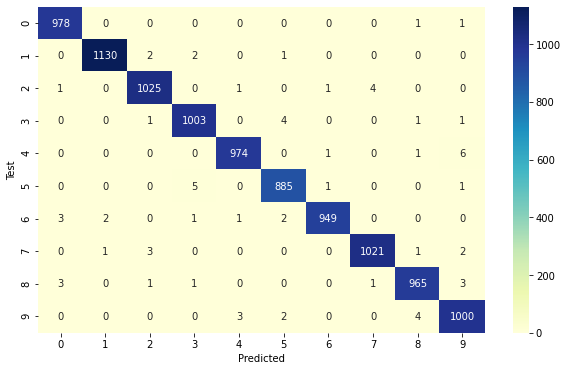

In [10]:
Y_Pred = np.argmax(model.predict(X_test), axis=-1)
df = pd.DataFrame([y_test,Y_Pred]).T
df.columns = ['Test','Predicted']
confusion_matrix = pd.crosstab(df['Test'], df['Predicted'], rownames=['Test'], colnames=['Predicted'])

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap="YlGnBu")
plt.show()

Plot some of the misclassified digits.

In [0]:
missed = np.where(y_test != Y_Pred)[0] # indices of miss classified imaged

missed_imgs = X_test[missed,:].reshape(-1,28,28) # missed images from test dataset
missed_true = y_test[missed] # true labels of missed images
missed_pred = Y_Pred[missed] # predicted labels of missed images

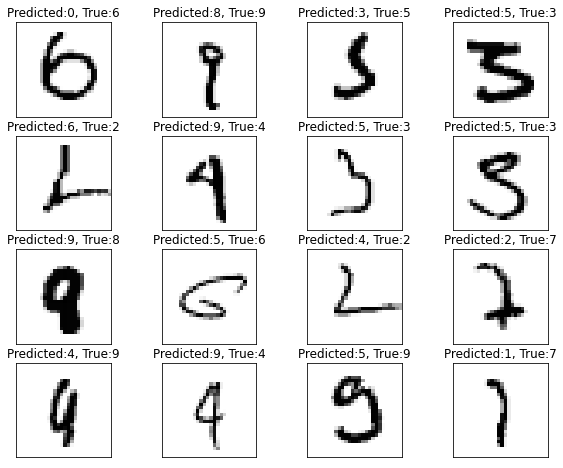

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
i = 0
for ax in axs.flat:
  ax.imshow(missed_imgs[i,:,:], cmap='Greys')
  ax.set_title('Predicted:%d, True:%d'%(missed_pred[i],missed_true[i]))
  i += 1